# Digital Circuits

## Combinational systems

## Schedule:

- Getting started
- Introduction
- Digital binary information
- Boolean algebra
- Boolean functions
- Canonical and standardized forms
- Simplification of functions
- **Combinational systems**
 - Introduction
 - Encoders and decoders
 - Multiplexers and demultiplexers
 - Half and full adder
- Sequential systems

In [ ]:
# Run this only in Colab
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
colab_path = '/content/drive/My Drive/Colab Notebooks/digital/notebooks/img/'
my_path = 'img/'
valid_path = colab_path # Use one of them depending on the platform

## Specifying logic circuits with Verilog

### Introduction

A hardware description language **(HDL)** is a specialized computer language used to describe the structure and behavior of electronic circuits, and most commonly, digital logic circuits.

A hardware description language enables a precise, formal description of an electronic circuit that allows for the automated analysis and simulation of an electronic circuit. It also allows for the **synthesis of an HDL description into a netlist** (a specification of physical electronic components and how they are connected together), which can then be placed and routed to produce the set of masks used to create an integrated circuit.

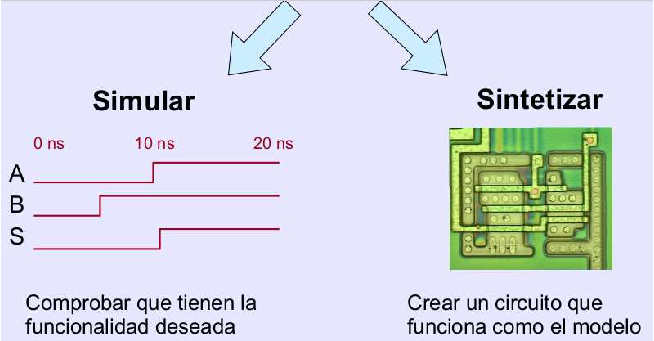

In [ ]:
from IPython.display import SVG
SVG(valid_path + 'comb13.svg')

The two most widely used and well-supported HDL varieties used in industry are **Verilog** and **VHDL**.

A digital system can be custom developed with hardware designed for a specific problem, as is the case with our decimal to BCD encoder. However, in general applications a fixed hardware is normally used (microprocessor, DSP,...), which reads a program to develop a task.

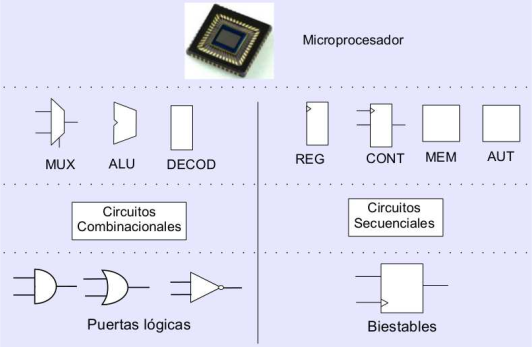

In [ ]:
SVG(valid_path + 'comb14.svg')

In our case we will not use a microprocessor, DSP, microcontroller or any other form of fixed programmable hardware. We will describe our digital system by means of a HDL (Verilog), according to the desired logical behavior in our digital hardware. Then, we will implement it on a programmable device (FPGA, CPLD, ...).

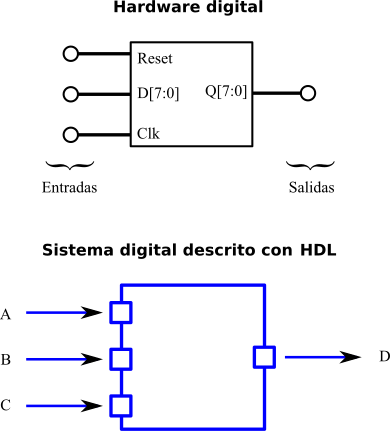

In [ ]:
SVG(valid_path + 'comb15.svg')

## Design using schematics

The PSoC Creator IDE allows us to implement digital circuits using schematics. The first thing is to run PSoC Creator.

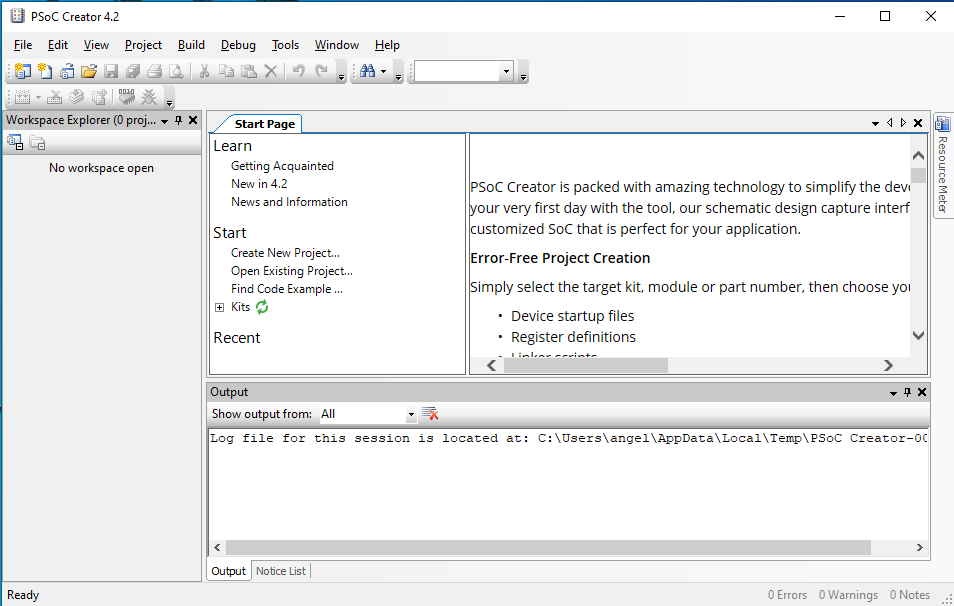

In [ ]:
from IPython.display import Image
Image(filename=valid_path + 'fig1.png')

As in most IDE's, all the work files of a design are saved within a project. To create a project, select the first menu option, *File -> New -> Project...*, and create a new project. In the first window you must choose the kit or microcontroller used for development, in the recommended version of the PSoC Creator is only available the option CY8CKIT-059 (PSoC 5LP), in the .iso version you must install the corresponding libraries and select this kit.

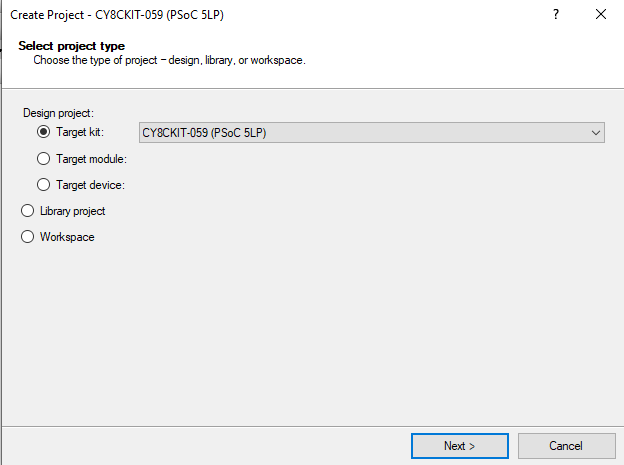

In [ ]:
Image(filename=valid_path + 'fig2.png')

In the next window you are asked to select the template for the project, you must select the *Empty schematic* option.

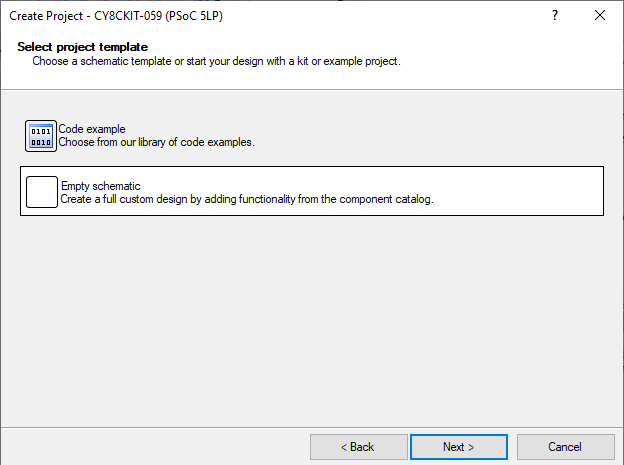

In [ ]:
Image(filename=valid_path + 'fig3.png')

Then, the next window requests information on the name of the project and the location of the design files.

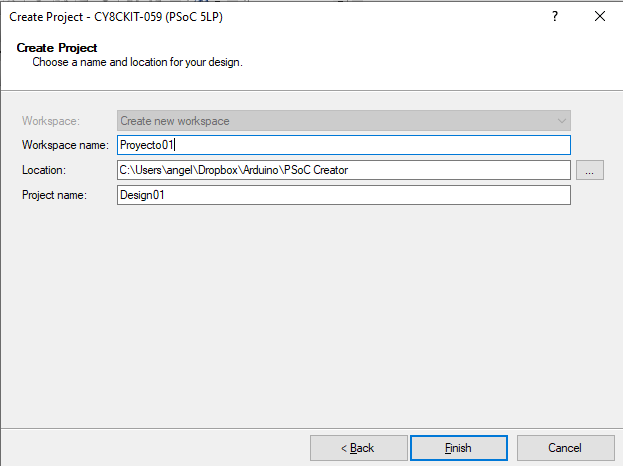

In [ ]:
Image(filename=valid_path + 'fig4.png')

With this information the IDE creates the structure of an empty project. In the central part, a blank sheet for drawing the connection diagrams can be seen, this is saved in a file with the extension *.cysch*. On the left is the *Workspace Explorer*, where you can see all the design files of the project, and can manipulate them as appropriate. On the right are the design libraries organized by sections, and at the bottom is an output window that displays information on each process performed in the IDE.

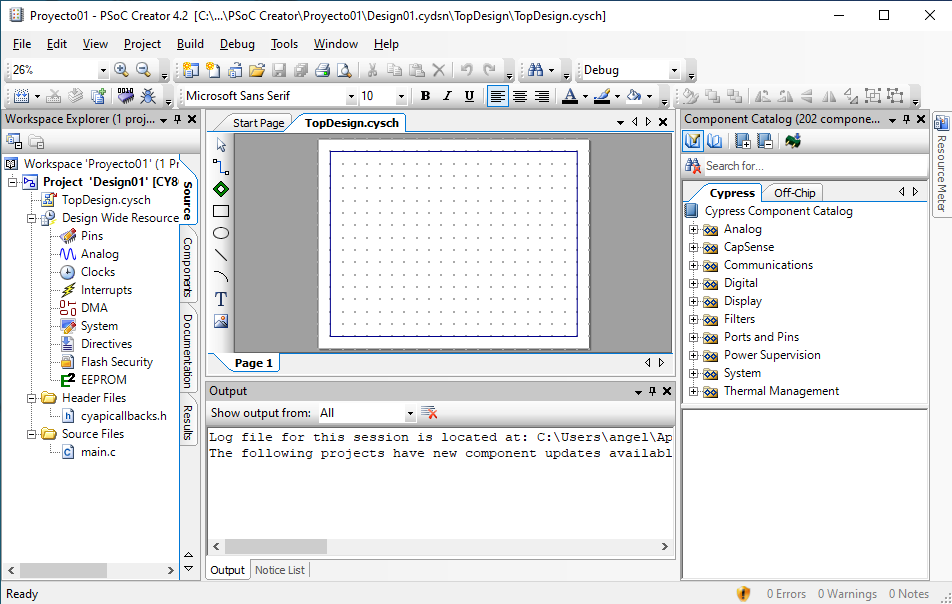

In [ ]:
Image(filename=valid_path + 'fig5.png')

As a first design example we will implement a simple switch. To do this we will use an inverter that delivers a logical 1 on an LED when a button grounds the input (pressed), and a logical 0 on the LED when the button places a high level on the input (without pressing it). The development kit already has a LED and a button connected, the idea is as shown in the figure below.

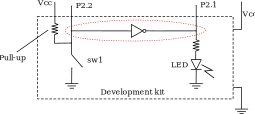

In [ ]:
SVG(valid_path + 'fig8.svg')

From the library, in the *Digital -> Logic* section drag a NOT gate to the schematics window. This is the logical part of this example.

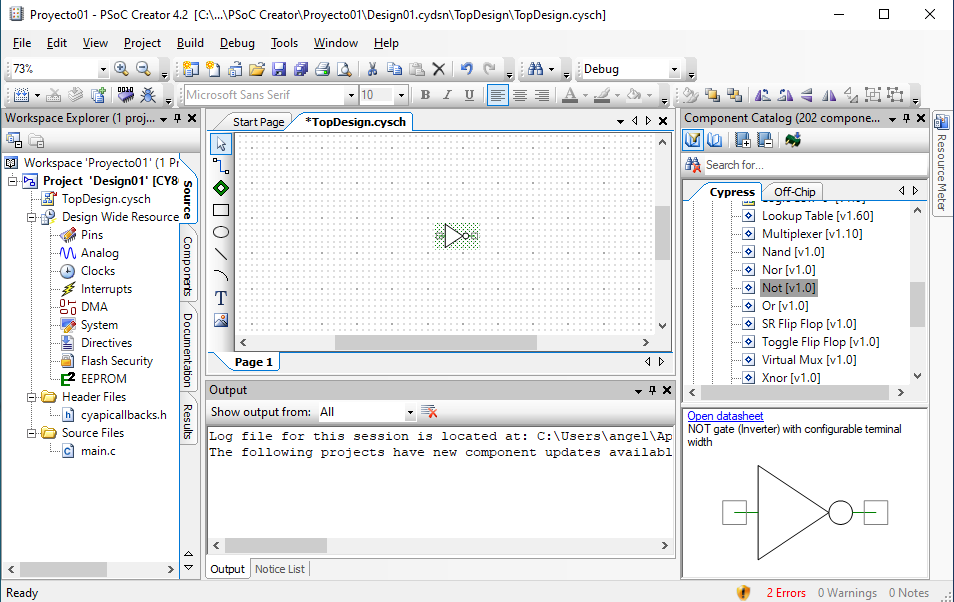

In [ ]:
Image(filename=valid_path + 'fig6.png')

For the input, our push-button, we are going to drag an input pin to the diagram window, the *Ports and Pins -> Digital Input Pin*, this will be configured as an input and connected to a physical pin in the microcontroller, in our case the pin that the push-button has connected on the board. Double click on the pin to edit it. The input pin needs a pull-up resistor to ensure a high input when the button is not pressed (see the back of the kit for the button connection detail). To do this in the *Drive mode* option we choose *Resistive pull up*, and choose that the initial state is 1. Investigate what the other options mean.

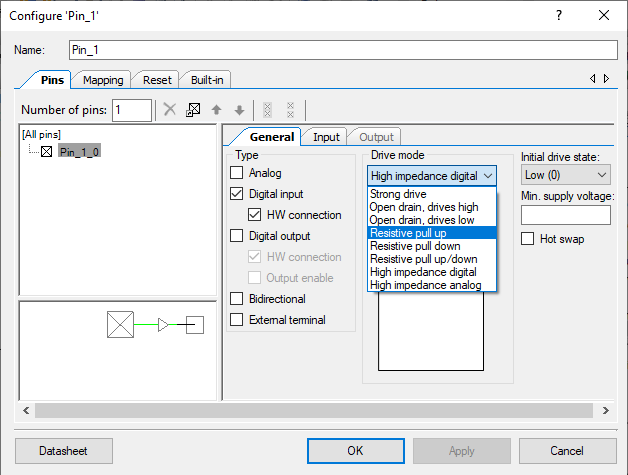

In [ ]:
Image(filename=valid_path + 'fig9.png')

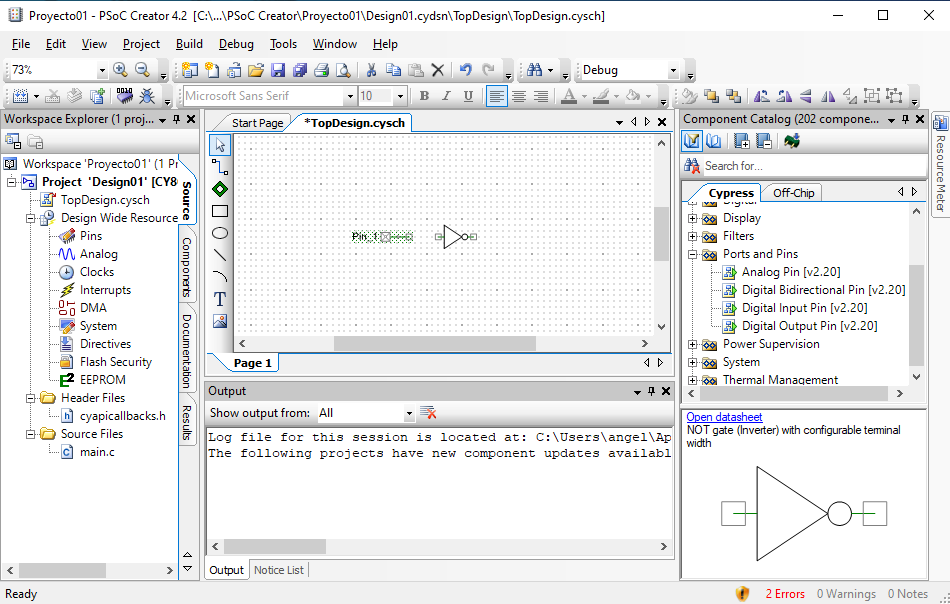

In [ ]:
Image(filename=valid_path + 'fig7.png')

Similarly we drag a digital output from *Ports and Pins -> Digital Output Pin*, configure it as *Strong drive*. To make the connections we select the *Wire Tool* button (or with the W key) with which the pointer becomes a cross, and we draw the connections between the elements.

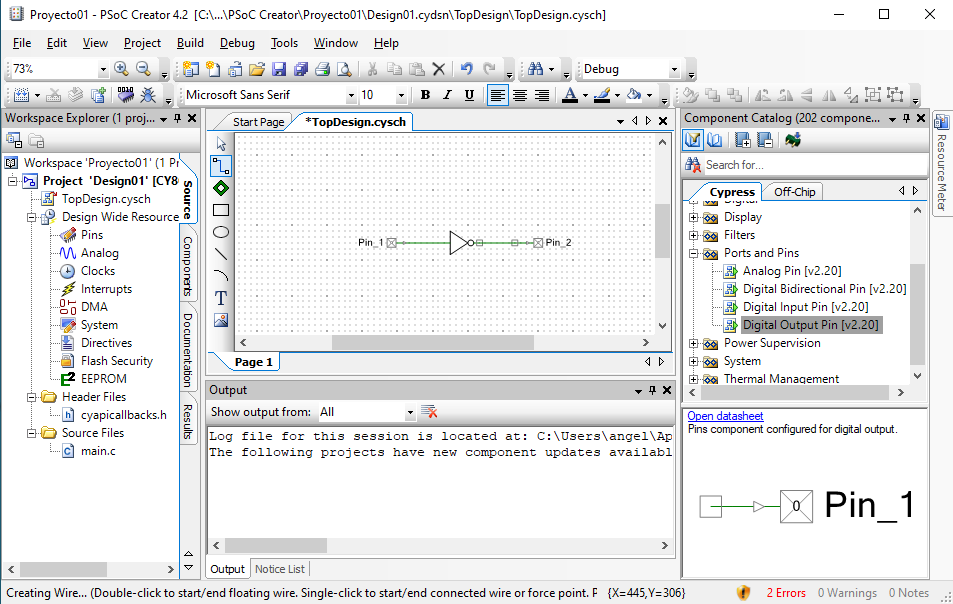

In [ ]:
Image(filename=valid_path + 'fig10.png')

Now we'll assign the pins. For convenience, we will choose as input pin P2.2 which already has a push button connected, and as output pin P2.1 which already has a LED connected. In the *Workspace Explorer* we double click on the *Pins* icon under the *Design Wide Resource* section. This opens the tab of the following figure.

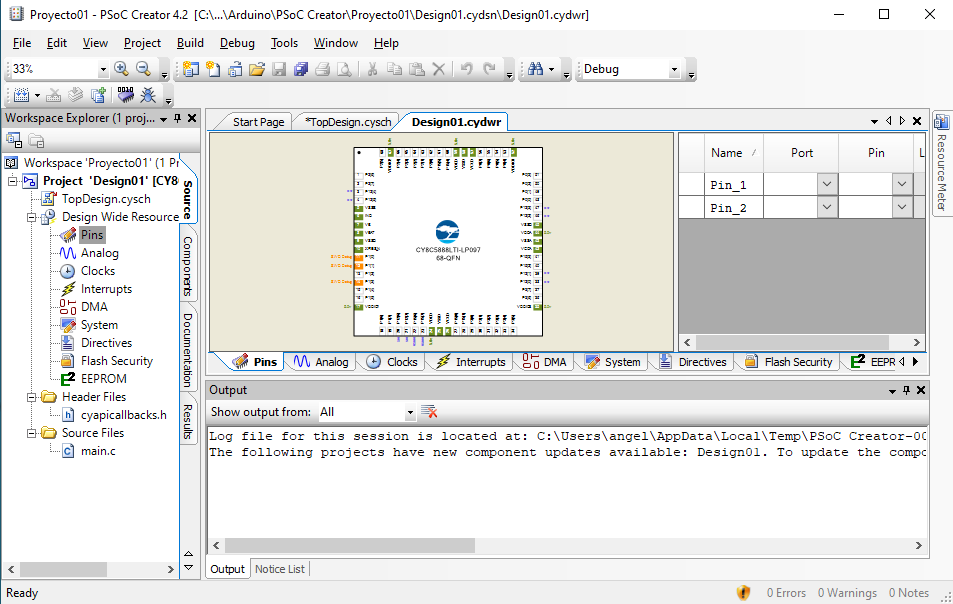

In [ ]:
Image(filename=valid_path + 'fig11.png')

In our example Pin_1 corresponds to the input pin (which we will connect to the terminal P2.2) and Pin_2 corresponds to the output pin (which we will connect to the LED of the terminal P2.1). In the *Port* tab we then choose P2[2] for Pin_1 and P2[1] for Pin_2.

In [ ]:
Image(filename=valid_path + 'fig12.png')

The next step is to compile the design. To do this, press the *Build Design01* button (or the key combination *Shift + F6*). If everything comes out without errors (you have to be aware of the process in the output window at the bottom), you will already have your output file to record in the microcontroller.

Once the code has been compiled without errors, it can be downloaded to the microcontroller's FLASH memory. For programming, the kit must be connected to a USB port on the computer without pressing any buttons. If all is well, the amber Power LED should light up. A configuration message should be displayed, and another at the end indicating that the kit is ready to be used. By default, the blue LED should turn on and off in about one second, and then turn off when the button is pressed.

To program the Flash memory, press the *Program* button or the key combination *Ctrl + F5*. You probably need to update the firmware with the PSoC Programmer.